# Vanessa Williams
#  Assignment 2

In [159]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [161]:
car = pd.read_csv("car_data.csv") #Created a data frame using the data in car_data.cvs file
print(car)

     weight  hwy_mpg
0      2548       27
1      2548       27
2      2823       26
3      2337       30
4      2824       22
..      ...      ...
200    2952       28
201    3049       25
202    3012       23
203    3217       27
204    3062       25

[205 rows x 2 columns]


# 1.Make a scatterplot of the highway miles per gallon (y-axis) versus the weight (x-axis)

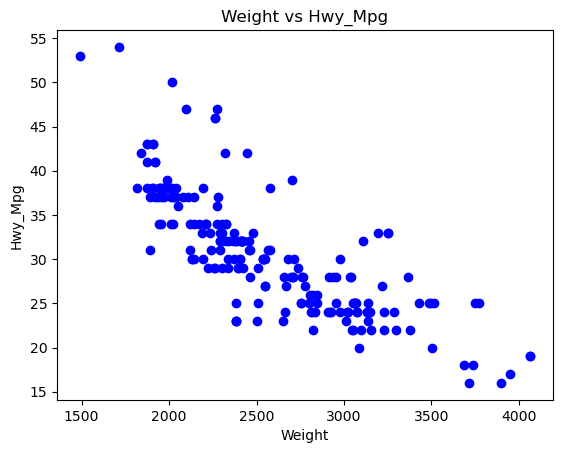

In [164]:
#Created a scatter plot of weight vs hwy_mpg. Create x and y labels and the title
plt.scatter(car["weight"], car["hwy_mpg"], c = "blue")
plt.xlabel("Weight")
plt.ylabel("Hwy_Mpg")
plt.title("Weight vs Hwy_Mpg")
plt.show()

# 2.Based on your plot, what is the general trend of how highway miles per gallon varies with the weight.

#Linear relation between the hwy_mpg and weight. The slope of the line is negative. That means when one variable increases,
#the other variable decreases. The heavier the vehicle, the less hwy_mpg it uses. 

# 3.If you were to build a linear model using this data to predict highway miles per gallon from weight, would you expect the slope to be positive or negative? Explain

#The slope of the line is negative. The reason is, the dots are coming down.

# 4.If the slope of a linear model predicting highway miles per gallon from the weight, interpret the meaning of the slope being −0.05.

#If you increase the weight by one unit, the hwy_mpg will decrease by 0.05.

# 5.Write code to add a line to the graph you made in problem (1). Adjust the slope and y-intercept of this line until you think you have found the line that best fits the data. Record the slope and y-intercept

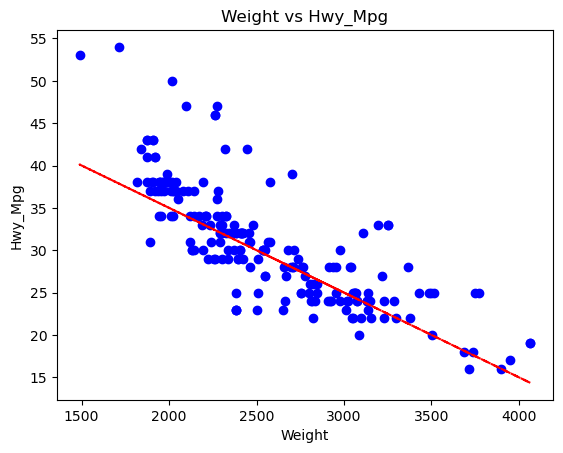

In [173]:
#Set up the x values using the weight
x_values = car["weight"]

#Create function to calculate y values using m slope b intercept
def lin_fun(m, b, x):
    y_values = []
    for value in x: 
        temp = m * value + b
        y_values.append(temp)
    return np.array(y_values)

#Choose values for m and b. Examine the graph and change the values of m and b if necessary
m = -.01
b = 55

#Calculate the predicted values for the chosen m and b
y_values = lin_fun(m, b, x_values)
plt.scatter(car["weight"], car["hwy_mpg"], c = "blue")
plt.xlabel("Weight")
plt.ylabel("Hwy_Mpg")
plt.title("Weight vs Hwy_Mpg")

#Plot the graph and the best fit line found
plt.plot(x_values, y_values, "r--")
plt.show()

# 6.Use Python to find the best-fit line. The Scikit-learn package is a good choice to use for this

In [176]:
print(y_values)

[29.52 29.52 26.77 31.63 26.76 29.93 26.56 25.46 24.14 24.47 31.05 31.05
 27.9  27.35 24.45 22.7  21.2  19.95 40.12 36.26 35.91 36.24 36.24 33.72
 35.33 35.11 35.11 33.09 29.65 26.89 37.87 36.81 36.63 35.6  35.44 34.9
 34.76 32.64 32.11 31.96 31.28 30.35 32.07 31.63 36.26 35.91 27.66 14.34
 14.34 15.5  36.1  36.   35.95 35.55 35.5  31.2  31.2  31.15 30.   31.15
 30.9  31.15 30.9  30.57 30.75 28.3  28.   19.85 17.5  20.05 17.3  17.6
 18.15 16.   17.85 25.9  35.82 35.56 34.96 33.55 31.3  31.72 26.67 25.79
 25.74 31.35 30.95 30.97 30.97 36.11 34.83 35.82 35.62 34.76 35.49 34.72
 35.29 34.63 34.92 31.76 31.98 24.05 22.04 24.4  24.29 23.61 23.61 24.8
 23.03 22.7  20.7  24.25 22.48 22.15 20.15 24.25 22.48 23.7  35.82 33.72
 35.33 35.11 33.09 29.65 26.82 27.22 27.44 27.44 27.   21.34 29.21 30.4
 28.42 28.05 27.93 27.42 26.92 26.53 34.5  33.8  32.6  33.55 33.1  31.6
 31.15 29.9  32.1  30.45 30.8  28.5  35.15 34.6  34.85 32.2  32.1  23.9
 34.19 33.91 32.25 32.25 34.06 33.78 33.6  33.31 32.96 32

In [178]:
from sklearn.linear_model import LinearRegression

In [180]:
#Define y and x arrays. Reshape in order to use with the linear regression
x = np.array(car["weight"]).reshape(-1, 1)
y = np.array(car["hwy_mpg"]).reshape(-1, 1)

#Create a linear regression model and fit the x and y values
reg = LinearRegression()
reg.fit(x, y)

LinearRegression()

In [182]:
#Print the R squared value
print(reg.score(x, y))

0.6359500949280651


In [184]:
#Print the slope
reg.coef_

array([[-0.01054716]])

In [186]:
#Print the intercept
reg.intercept_

array([57.70517423])

In [188]:
#Regression line is (actual best fit line)
#hwy_mpg = 57.70517423 -(0.01054716 * weight)

# 7.Find the root mean squared error (RMSE) of the prediction line you found in problem (4) and the actual best-fit line found in problem (5). How do these compare?

In [191]:
from sklearn.metrics import mean_squared_error
import statistics

In [193]:
#Calculate the predicted values using the best fit line
predictedvalues = 57.70517423 -(0.01054716 * car["weight"])
print(predictedvalues)

0      30.831011
1      30.831011
2      27.930542
3      33.056461
4      27.919994
         ...    
200    26.569958
201    25.546883
202    25.937128
203    23.774961
204    25.409770
Name: weight, Length: 205, dtype: float64


In [195]:
#Calculate the mean squared error of the predicted values and actual values. using the best fit line found in the regression
mse = mean_squared_error(car["hwy_mpg"], predictedvalues)

#Calcultate the root mean squared error
rmse = math.sqrt(mse)
print("rmse using actual best fit line: ",rmse)

rmse using actual best fit line:  4.144895442078578


In [197]:
#Calculate the mean squared error of the predicted and actual values using the best fit found in problem 5
mse2 = mean_squared_error(car["hwy_mpg"], y_values)

#Calculate the mean squared error
rmse2 = math.sqrt(mse2)
print("rmse using the prediction line in problem 4: ",rmse2)

rmse using the prediction line in problem 4:  4.355325139776677


# 8.Use the best-fit line in problem (5) to predict the highway mpg of a car that weighs 3200 pounds

In [200]:
#Calculated the predicted value of 3200 weight using the best fit found in problem 5
x_value = 3200
predict_value = b + (m * x_value)
print("The predict hwy_mpg of the car that weighs 3200 pounds: ",predict_value)

The predict hwy_mpg of the car that weighs 3200 pounds:  23.0
